In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/cicids_m.csv")

In [ ]:
# 4. Check label count distribution
label_counts = df["Label"].value_counts()
print("\nLabel distribution in the sampled dataset before soup:")
print(label_counts)


Label distribution in the sampled dataset before soup:
Label
4     5446
8     3894
2     3032
3      269
7      197
9      166
5      137
6      134
1       53
10      31
11      14
Name: count, dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index([], dtype='object')


In [ ]:
df.drop(columns=categorical_cols, inplace=True)


In [ ]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")

In [ ]:
# Count rows with at least one missing value
missing_rows_count = df.isnull().any(axis=1).sum()
print(missing_rows_count)

29


In [ ]:


# Check for missing values in each column
missing_columns = df.isnull().sum()



In [ ]:
df=df.fillna(df.mean())  # Mean

In [ ]:
import numpy as np

In [ ]:

def check_infinite_values(df):
    infinite_values = df.isin([np.inf, -np.inf]).sum()
    total_infinite = infinite_values.sum()

    if total_infinite > 0:
        print("Infinite values found in the dataset:")
        print(infinite_values[infinite_values > 0])
    else:
        print("No infinite values found in the dataset.")

# Example usage
check_infinite_values(df)

Infinite values found in the dataset:
Flow Bytes/s       34
 Flow Packets/s    34
dtype: int64


In [ ]:
import numpy as np
import pandas as pd


# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")




In [ ]:
df=df.fillna(df.mean())  # Mean

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()

# Separating features and label
features = df.drop(columns=["Label"])  # Drop the label column
label = df["Label"]  # Store the label separately

# Fit and transform the features
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add the label column back
df_scaled = pd.concat([features_scaled, label], axis=1)

print("Data after Standard Scaling (Label column excluded from scaling):")
print(df_scaled.head())


Data after Standard Scaling (Label column excluded from scaling):
    Destination Port   Flow Duration   Total Fwd Packets  \
0           3.523502       -0.688428           -0.748278   
1           5.877149       -0.688428           -0.748278   
2          -0.304587       -0.666516           -0.245920   
3           0.751914       -0.688428           -0.748278   
4          -0.304587       -0.645011           -0.245920   

    Total Backward Packets  Total Length of Fwd Packets  \
0                -0.561953                    -0.162199   
1                -0.561953                    -0.162199   
2                 0.703881                    -0.137881   
3                -0.561953                    -0.160328   
4                 0.450714                    -0.137881   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                     -0.866582               -0.526706   
1                     -0.866582               -0.526706   
2                      1.141852          

In [ ]:
df=df_scaled

In [ ]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [ ]:
label_counts = df["Label"].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
Label
4     5446
8     3894
2     3032
3      269
7      197
9      166
5      137
6      134
1       53
10      31
11      14
Name: count, dtype: int64


In [ ]:
check_infinite_values(df)

No infinite values found in the dataset.


In [ ]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [ ]:
# Save the new dataset
df.to_csv("mulf_cicids.csv", index=False)

# BALANCING USING SMOTE

In [ ]:
df=pd.read_csv("/content/mulf_cicids.csv")

In [ ]:
label_counts = df["Label"].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
Label
4     5446
8     3894
2     3032
3      269
7      197
9      166
5      137
6      134
1       53
10      31
11      14
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-24-793874de00c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


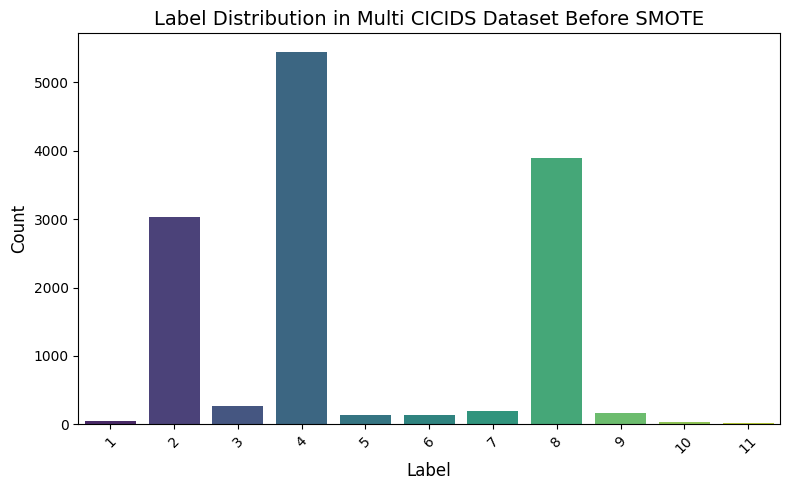

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution in Multi CICIDS Dataset Before SMOTE", fontsize=14)
plt.xticks(rotation=45)

# Save figure
plt.tight_layout()
plt.savefig('multi_cicids_label_distribution_before_smote.png', dpi=800)

# Show plot
plt.show()


In [ ]:
!pip install multi_imbalance

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.7 MB/s eta 0:00:00
  Created wheel for multi_imbalance: filename=multi_imbalance-0.0.14-py3-none-any.whl size=44759 sha256=12e36bba7269ee73dbfcd13019b1a6ae9cd50561d67c42b04fb8b2c35b55f452
  Stored in directory: /root/.cache/pip/wheels/fd/5a/53/f4cf214ad8cd71e56557c4f7c9e699672f13d190dfdf5319d2
Successfully built multi_imbalance


In [ ]:
from multi_imbalance.resampling.soup import SOUP

In [ ]:
# Calculate the counts of each class in the 'Attack' column
class_counts = df['Label'].value_counts()

# Calculate the mean count across all classes
majority_cutoff = class_counts.mean()

# Separate the majority and minority groups based on the cutoff
majority_classes = class_counts[class_counts > majority_cutoff].index.tolist()
minority_classes = class_counts[class_counts <= majority_cutoff].index.tolist()

# Print the majority and minority groups
print("Majority Classes:")
print(majority_classes)

print("\nMinority Classes:")
print(minority_classes)

Majority Classes:
[4, 8, 2]

Minority Classes:
[3, 7, 9, 5, 6, 1, 10, 11]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9890
[LightGBM] [Info] Number of data points in the train set: 10698, number of used features: 66
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further split

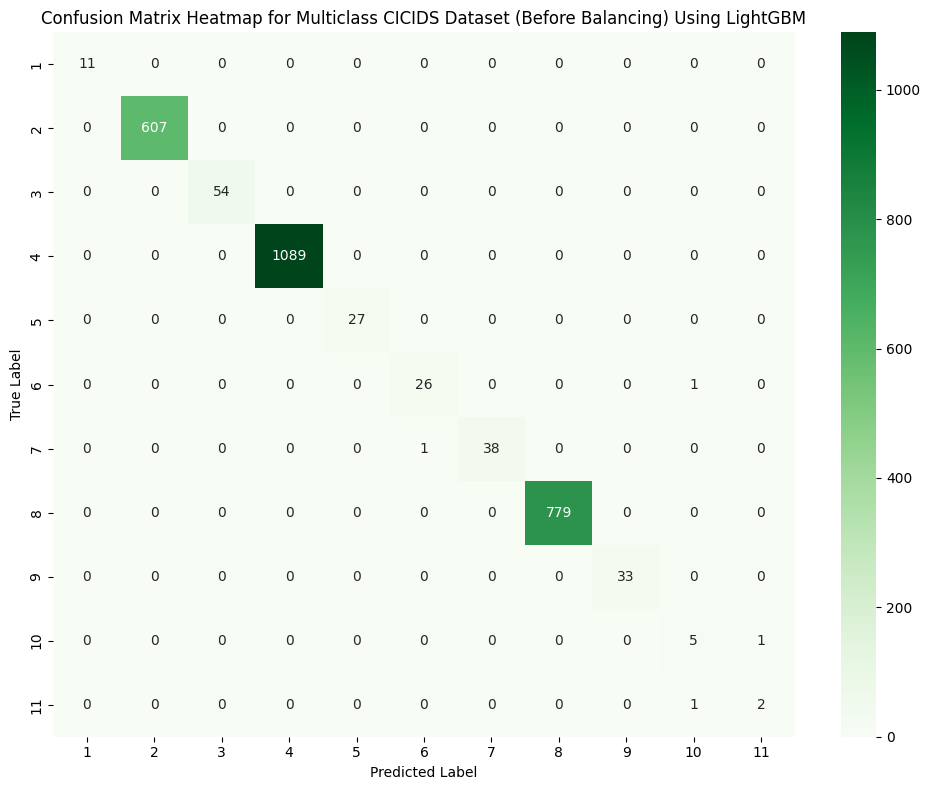

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# 2. Split into features and labels
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target label

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train a classifier (LightGBM) on imbalanced data
clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y)),
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',  # Helps deal with imbalance
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test)

# 6. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 7. Print classification report
print("Classification Report (Before Balancing) - Multiclass:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# 8. Generate and save heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Multiclass CICIDS Dataset (Before Balancing) Using LightGBM")
plt.tight_layout()

# Save the confusion matrix figure
plt.savefig('multiclass_cicids_confusion_matrix_lightgbm_before_balancing.png', dpi=800)

# Show plot
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.185620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15274
[LightGBM] [Info] Number of data points in the train set: 47924, number of used features: 66
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Warning] No further spli

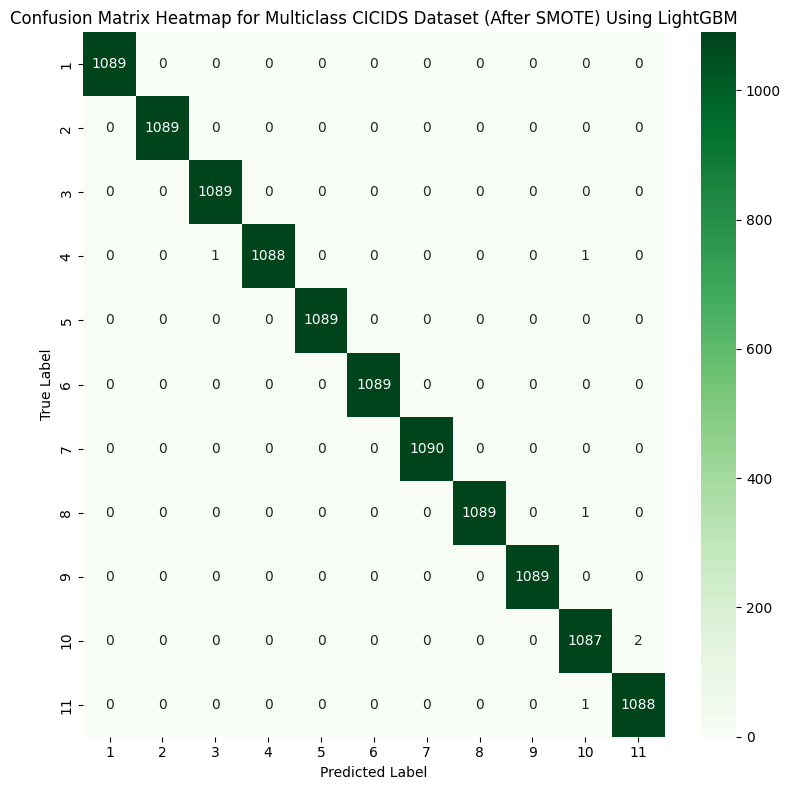

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Load the dataset
df = pd.read_csv("/content/mulf_cicids.csv") 

# 2. Split into features and labels
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target label

# 3. Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# 4. Save the balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df["Label"] = y_balanced
balanced_df.to_csv("bal_multi_cicids.csv", index=False)

# 5. Train-test split (after SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# 6. Train a classifier (LightGBM)
clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y)),
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    class_weight=None, 
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# 7. Make predictions
y_pred = clf.predict(X_test)

# 8. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 9. Print classification report
print("Classification Report (After SMOTE - Multiclass) with LightGBM:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# 10. Generate and save heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))  # Keep order of true labels
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Multiclass CICIDS Dataset (After SMOTE) Using LightGBM")
plt.tight_layout()

# Save the confusion matrix figure
plt.savefig('multiclass_cicids_confusion_matrix_lightgbm_after_smote.png', dpi=800)

# Show plot
plt.show()


In [ ]:
df=pd.read_csv("/content/bal_multi_cicids.csv")

In [ ]:
# 4. Check label count distribution
label_counts = df["Label"].value_counts()
print("\nLabel distribution in the sampled dataset after SMOTE:")
print(label_counts)


Label distribution in the sampled dataset after SMOTE:
Label
8     5446
2     5446
4     5446
7     5446
5     5446
9     5446
1     5446
10    5446
3     5446
6     5446
11    5446
Name: count, dtype: int64


<ipython-input-48-f1353f08914f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


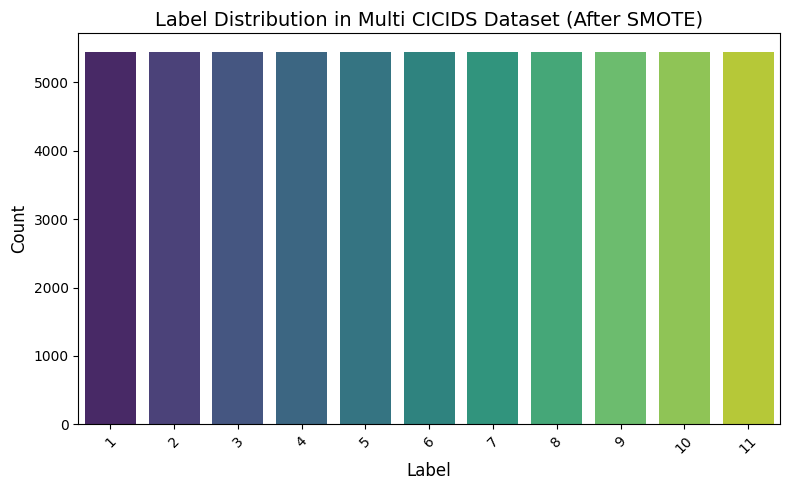

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution in Multi CICIDS Dataset (After SMOTE)", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()

# Save the figure
plt.savefig('multi_cicids_label_distribution_after_smote.png', dpi=800)

# Show plot
plt.show()


# **Filtering mechanism**

# Correlation-Based Filtering

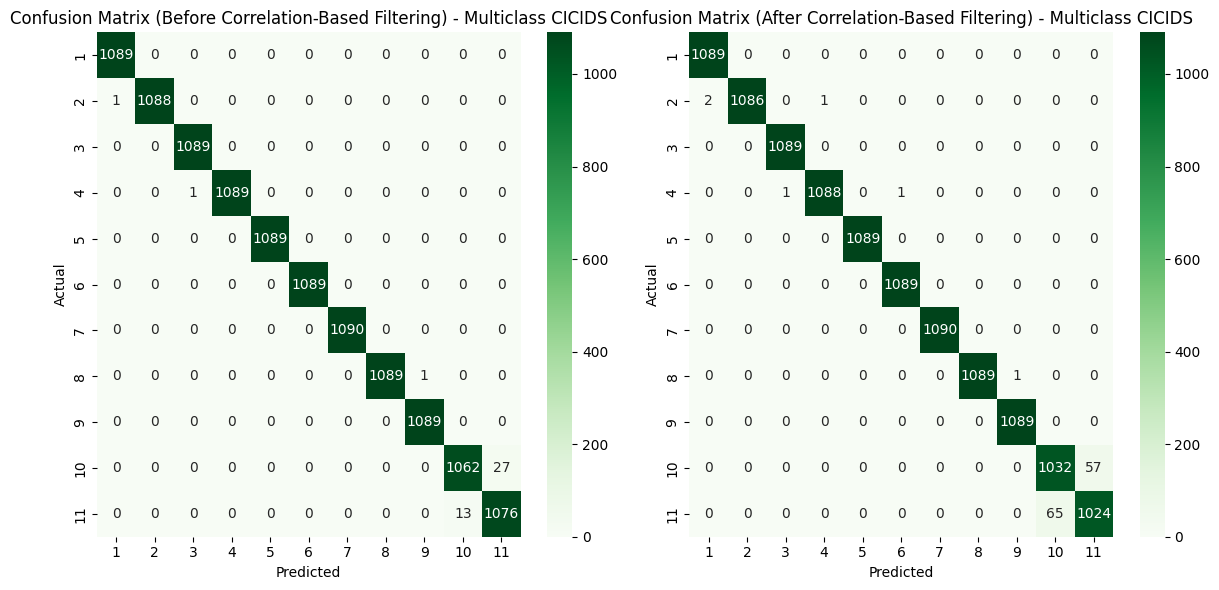

<Figure size 800x600 with 0 Axes>

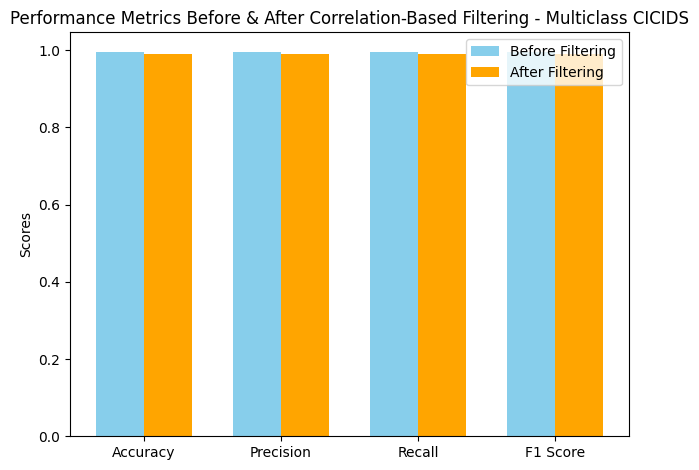

Before Filtering - Accuracy: 0.9964, Precision: 0.9964, Recall: 0.9964, F1 Score: 0.9964
After Filtering - Accuracy: 0.9893, Precision: 0.9893, Recall: 0.9893, F1 Score: 0.9893


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize dictionary to store classification results
classification_results = {}

# --- Load dataset ---
df = pd.read_csv("/content/bal_multi_cicids.csv")  

# Check dataset is multiclass
assert df['Label'].nunique() > 2, "Error: Dataset is not multiclass!"

# Define features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Copy original feature names
original_feature_names = X.columns.tolist()

# --- Correlation-based Filtering ---
correlation_threshold = 0.9
correlation_matrix = X.corr()

# Identify highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
drop_columns = [col for col in upper_triangle.columns if any(upper_triangle[col].abs() > correlation_threshold)]

# Create filtered dataset but keep feature names intact
X_filtered = X.copy()
X_filtered.loc[:, drop_columns] = 0

# Ensure feature names are unchanged
assert list(X_filtered.columns) == original_feature_names, "Feature names have changed!"

# Save dataset after filtering
df_after_filtering = pd.concat([X_filtered, y], axis=1)
df_after_filtering.to_csv("filtcorr_multiclass_cicids.csv", index=False)

# --- Train-Test Split ---
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# --- Train Random Forest Classifier ---
clf = RandomForestClassifier(random_state=42)

# Train and predict before filtering
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict after filtering
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# --- Compute Metrics (Weighted Averaging) ---
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='weighted')
recall_before = recall_score(y_test_before, y_pred_before, average='weighted')
f1_before = f1_score(y_test_before, y_pred_before, average='weighted')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='weighted')
recall_after = recall_score(y_test_after, y_pred_after, average='weighted')
f1_after = f1_score(y_test_after, y_pred_after, average='weighted')

# --- Confusion Matrices ---
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Labels for multiclass classification
multiclass_labels = [str(label) for label in np.unique(y)]

# --- Plot Confusion Matrices ---
plt.figure(figsize=(12, 6))

# Before filtering
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens',
            xticklabels=multiclass_labels, yticklabels=multiclass_labels)
plt.title('Confusion Matrix (Before Correlation-Based Filtering) - Multiclass CICIDS')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# After filtering
plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens',
            xticklabels=multiclass_labels, yticklabels=multiclass_labels)
plt.title('Confusion Matrix (After Correlation-Based Filtering) - Multiclass CICIDS')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrix_multiclass_cicids_correlation_filtering.png", dpi=800)
plt.show()

# --- Performance Comparison Graph ---
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Correlation-Based Filtering - Multiclass CICIDS')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_multiclass_cicids_correlation_filtering.png", dpi=800)
plt.show()

# --- Store and Print Classification Results ---
classification_results['Correlation-Based Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# Variance threshold filtering

Number of features before filtering: 78
Number of features after filtering: 66


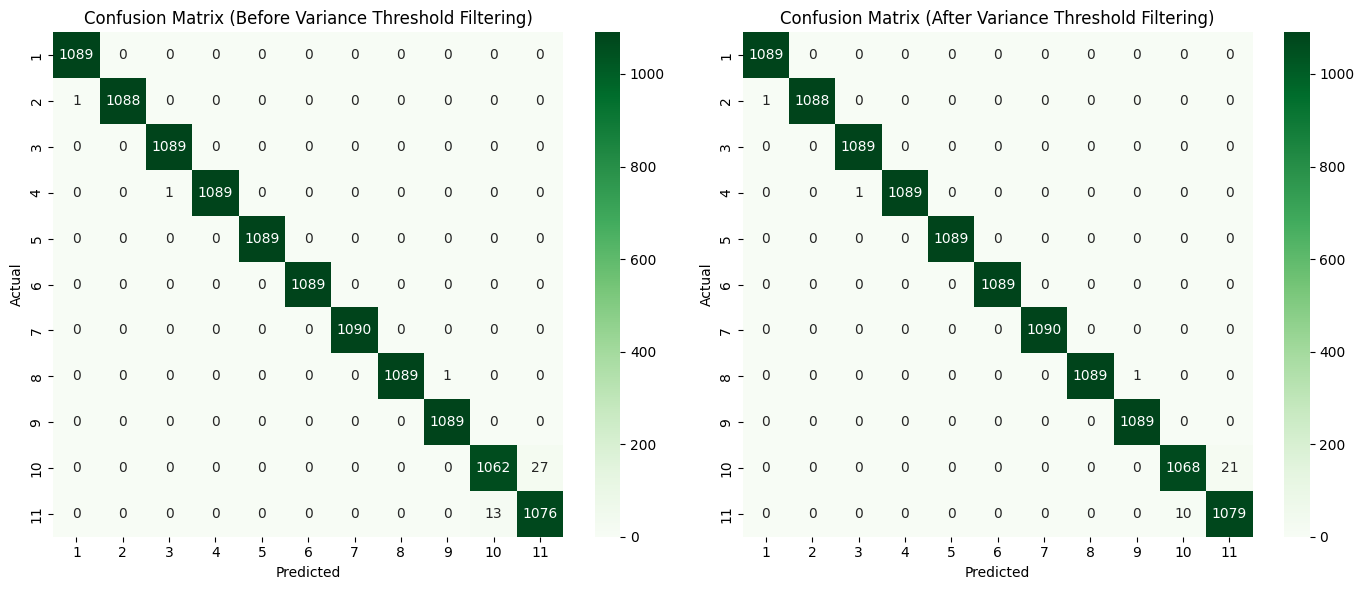

<Figure size 800x600 with 0 Axes>

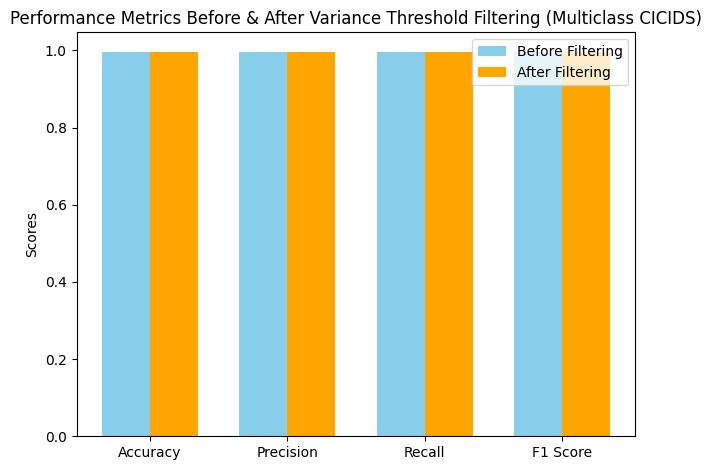


Before Filtering - Accuracy: 0.9964, Precision: 0.9964, Recall: 0.9964, F1 Score: 0.9964
After Filtering - Accuracy: 0.9972, Precision: 0.9972, Recall: 0.9972, F1 Score: 0.9972


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

# Load dataset
df = pd.read_csv("/content/bal_multi_cicids.csv")  

# Define features (X) and target (y)
X = df.drop(columns=['Label'])  # Features
y = df['Label']

# Variance Threshold Filtering
variance_threshold = 0.01  # Set the threshold for variance
selector = VarianceThreshold(threshold=variance_threshold)
X_after = selector.fit_transform(X)
X_filtered = pd.DataFrame(X_after, columns=X.columns[selector.get_support()])

# Show number of features before and after filtering
print(f"Number of features before filtering: {X.shape[1]}")
print(f"Number of features after filtering: {X_filtered.shape[1]}")

# Save filtered dataset
filtered_df = pd.concat([X_filtered, y], axis=1)
filtered_df.to_csv("/content/varthresh_multiclass_cicids.csv", index=False)

# Train-test split
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train and predict before filtering
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict after filtering
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics (macro for multiclass)
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='macro')
recall_before = recall_score(y_test_before, y_pred_before, average='macro')
f1_before = f1_score(y_test_before, y_pred_before, average='macro')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='macro')
recall_after = recall_score(y_test_after, y_pred_after, average='macro')
f1_after = f1_score(y_test_after, y_pred_after, average='macro')

# Confusion matrices
labels = sorted(np.unique(y))  # Ensure labels start properly (not from 0 if that's the dataset)
cm_before = confusion_matrix(y_test_before, y_pred_before, labels=labels)
cm_after = confusion_matrix(y_test_after, y_pred_after, labels=labels)

# Label names for plots
class_labels = [str(label) for label in labels]

# Plot Confusion Matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Before Variance Threshold Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (After Variance Threshold Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

# Save the confusion matrix figure
plt.savefig("/content/confusion_matrix_multiclass_cicids_varthresh.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Variance Threshold Filtering (Multiclass CICIDS)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()

# Save the performance comparison figure
plt.savefig("/content/performance_comparison_multiclass_cicids_varthresh.png", dpi=800)
plt.show()

# Store classification results


classification_results['Variance Threshold Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

# Print Results
print(f"\nBefore Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# mutual information based filtering

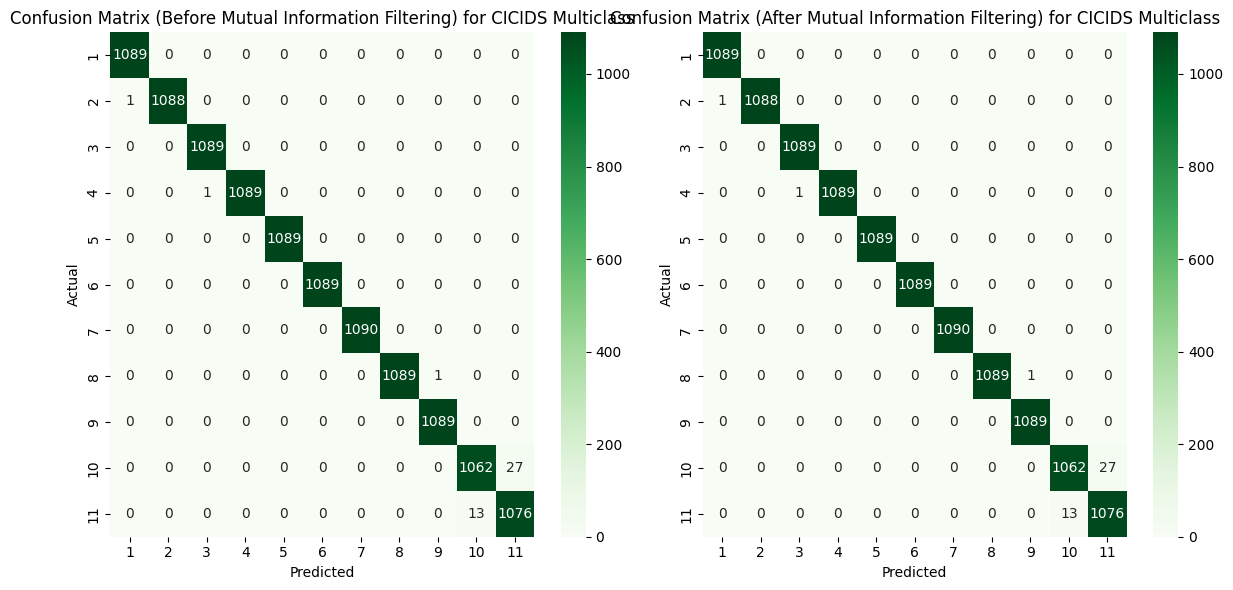

<Figure size 800x600 with 0 Axes>

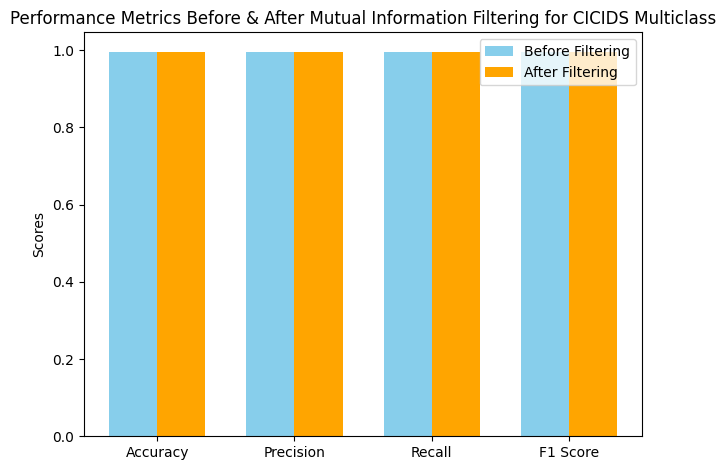

Before Filtering - Accuracy: 0.9964, Precision: 0.9964, Recall: 0.9964, F1 Score: 0.9964
After Filtering - Accuracy: 0.9964, Precision: 0.9964, Recall: 0.9964, F1 Score: 0.9964


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/bal_multi_cicids.csv") 

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Ensure labels don't start with 0 by adjusting them if necessary
unique_labels = np.unique(y)
label_offset = 1 - unique_labels.min()  # Offset to ensure labels start from 1
y = y + label_offset

# Copy original feature names
original_feature_names = X.columns.tolist()

# Mutual Information Filtering
mi = mutual_info_classif(X, y)
mi_threshold = 0.01
selected_features = X.columns[mi > mi_threshold]

# Create filtered dataset but keep feature names intact (set dropped features to 0)
X_filtered = X.copy()
X_filtered.loc[:, ~X_filtered.columns.isin(selected_features)] = 0

# Ensure feature names remain unchanged
assert list(X_filtered.columns) == original_feature_names, "Feature names have changed!"

# Save dataset after filtering
df_after_filtering = pd.concat([X_filtered, y], axis=1)
df_after_filtering.to_csv("filtmutualinfo_multiclass_cicids.csv", index=False)

# Train-test split (stratify to maintain class balance)
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute metrics for multiclass classification
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='weighted')
recall_before = recall_score(y_test_before, y_pred_before, average='weighted')
f1_before = f1_score(y_test_before, y_pred_before, average='weighted')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='weighted')
recall_after = recall_score(y_test_after, y_pred_after, average='weighted')
f1_after = f1_score(y_test_after, y_pred_after, average='weighted')

# Confusion matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=unique_labels + label_offset, yticklabels=unique_labels + label_offset)
plt.title('Confusion Matrix (Before Mutual Information Filtering) for CICIDS Multiclass')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=unique_labels + label_offset, yticklabels=unique_labels + label_offset)
plt.title('Confusion Matrix (After Mutual Information Filtering) for CICIDS Multiclass')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

# Save confusion matrix figure
plt.savefig("confusion_matrix_multiclass_cicids_mutual_info_filtering.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Mutual Information Filtering for CICIDS Multiclass')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()

# Save performance comparison figure
plt.savefig("performance_comparison_multiclass_cicids_mutual_info_filtering.png", dpi=800)
plt.show()

# Store classification results

classification_results['Mutual Information Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

# Display results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# comparison

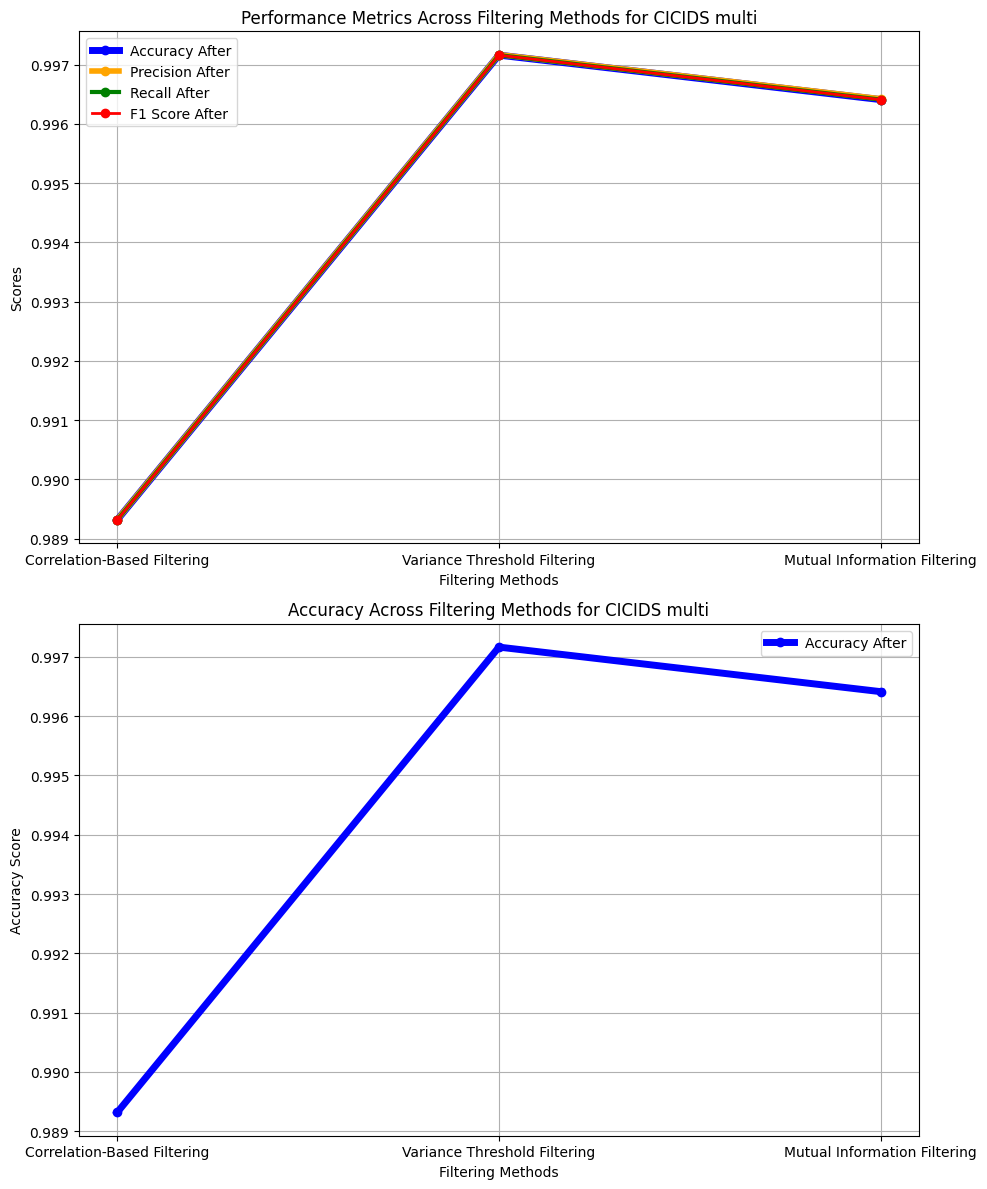

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
metrics_names = ['Accuracy After', 'Precision After', 'Recall After', 'F1 Score After']

# Create an empty dictionary to hold the metric values for each filtering method
metrics_values = {metric: [] for metric in metrics_names}

# Populate the dictionary with the values from classification_results
for method in classification_results:
    for metric in metrics_names:
        metrics_values[metric].append(classification_results[method][metric])

# Set distinct colors manually
colors = {
    'Accuracy After': 'blue',
    'Precision After': 'orange',
    'Recall After': 'green',
    'F1 Score After': 'red'
}

# Set line widths manually (thicker first)
line_widths = {
    'Accuracy After': 5,
    'Precision After': 4,
    'Recall After': 3,
    'F1 Score After': 2
}

# Create a figure with 2 subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# =========================
# First Plot: All Metrics
# =========================
for metric in sorted(metrics_names, key=lambda x: -line_widths[x]):
    axs[0].plot(
        list(classification_results.keys()),
        metrics_values[metric],
        label=metric,
        marker='o',
        linewidth=line_widths[metric],
        color=colors[metric]
    )

axs[0].set_xlabel('Filtering Methods')
axs[0].set_ylabel('Scores')
axs[0].set_title('Performance Metrics Across Filtering Methods for CICIDS multi')
axs[0].legend()
axs[0].grid(True)

# =========================
# Second Plot: Accuracy Only
# =========================
axs[1].plot(
    list(classification_results.keys()),
    metrics_values['Accuracy After'],
    label='Accuracy After',
    marker='o',
    linewidth=5,
    color='blue'
)

axs[1].set_xlabel('Filtering Methods')
axs[1].set_ylabel('Accuracy Score')
axs[1].set_title('Accuracy Across Filtering Methods for CICIDS multi')
axs[1].legend()
axs[1].grid(True)

# Layout adjustment
plt.tight_layout()

# Save the whole figure
plt.savefig('performance_metrics_multi_cicids_filtering_with_accuracy.png', dpi=800)

# Show the plots
plt.show()


# **univariate feature selction**

# select K best

Number of features before feature selection: 66
Number of features after feature selection (SelectKBest): 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15274
[LightGBM] [Info] Number of data points in the train set: 47924, number of used features: 66
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start t

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4878
[LightGBM] [Info] Number of data points in the train set: 47924, number of used features: 20
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


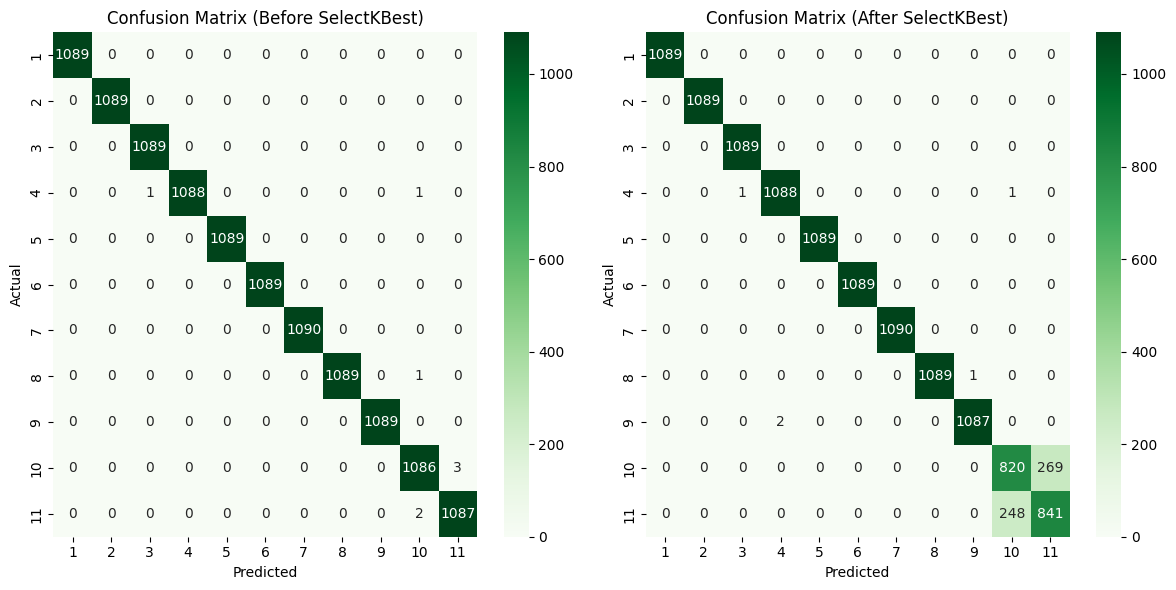

<Figure size 800x600 with 0 Axes>

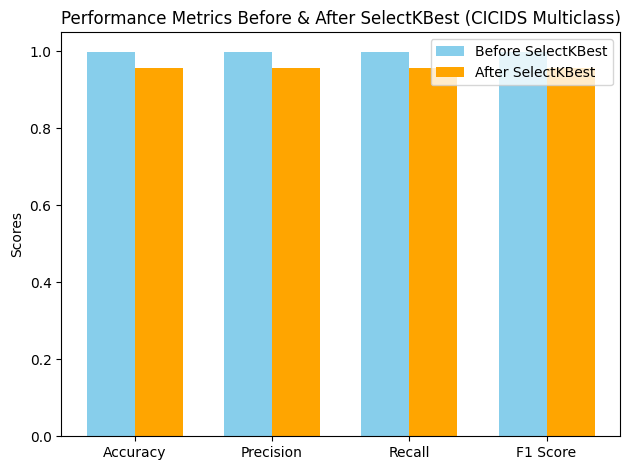

Before Filtering - Accuracy: 0.9993, Precision: 0.9993, Recall: 0.9993, F1 Score: 0.9993
After Filtering - Accuracy: 0.9564, Precision: 0.9565, Recall: 0.9564, F1 Score: 0.9564


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier  # Change from ExtraTreesClassifier to LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store classification results after filtering for later comparison
classification_results1 = {}

# Load dataset
df = pd.read_csv("/content/varthresh_multiclass_cicids.csv")  

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Create the original dataset (before filtering)
X_before = X.copy()
y_before = y.copy()

# SelectKBest Feature Selection
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_after = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Show the number of features before and after
print(f"Number of features before feature selection: {X_before.shape[1]}")
print(f"Number of features after feature selection (SelectKBest): {X_after.shape[1]}")

# Create a new dataset after filtering
X_after_df = pd.DataFrame(X_after, columns=selected_features)
df_after_filtering = pd.concat([X_after_df, y], axis=1)

df_after_filtering.to_csv("multi_featk_cicids.csv", index=False)

# Split the dataset
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X_before, y_before, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_after, y_before, test_size=0.2, random_state=42, stratify=y)

# Train classifier (using LightGBM instead of ExtraTreesClassifier)
clf = LGBMClassifier(random_state=42)

# Training on unfiltered data
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Training on filtered data
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='macro')  # macro average for multiclass
recall_before = recall_score(y_test_before, y_pred_before, average='macro')
f1_before = f1_score(y_test_before, y_pred_before, average='macro')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='macro')
recall_after = recall_score(y_test_after, y_pred_after, average='macro')
f1_after = f1_score(y_test_after, y_pred_after, average='macro')

classification_results1['SelectKBest'] = {
    'Accuracy': accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after
}

# Confusion matrices (for multiclass labels)
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Before SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (After SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrix_cicids_multiclass_selectkbest.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before SelectKBest', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After SelectKBest', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After SelectKBest (CICIDS Multiclass)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_cicids_multiclass_selectkbest.png", dpi=800)
plt.show()

# Display results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# mutual information

Number of features before filtering: 66
Number of features after filtering (Mutual Information): 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15274
[LightGBM] [Info] Number of data points in the train set: 47924, number of used features: 66
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score 

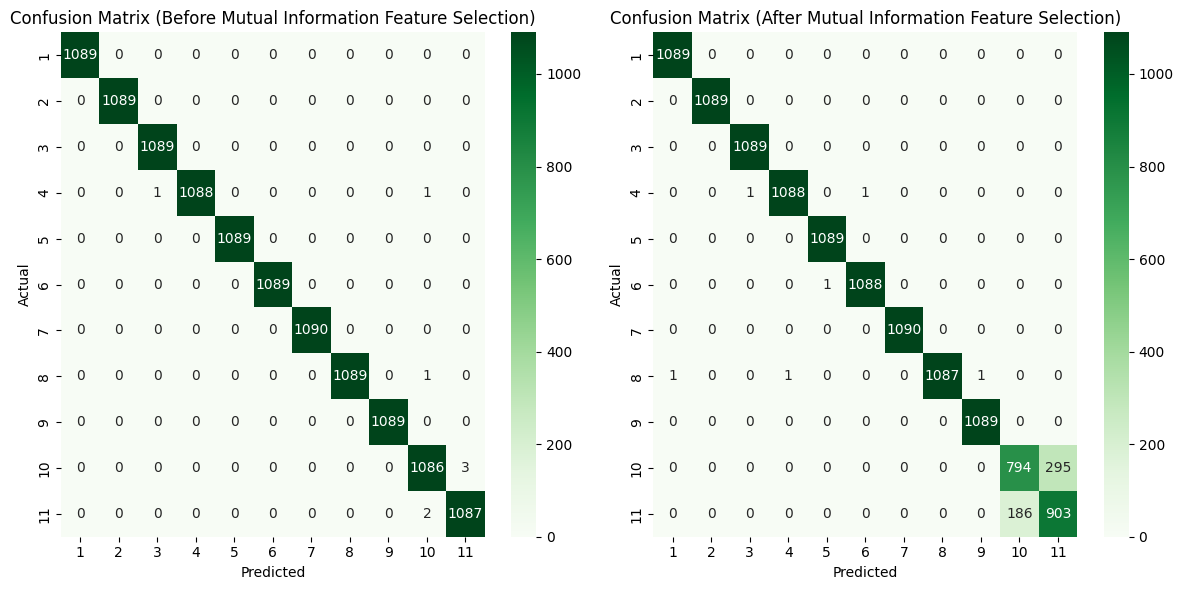

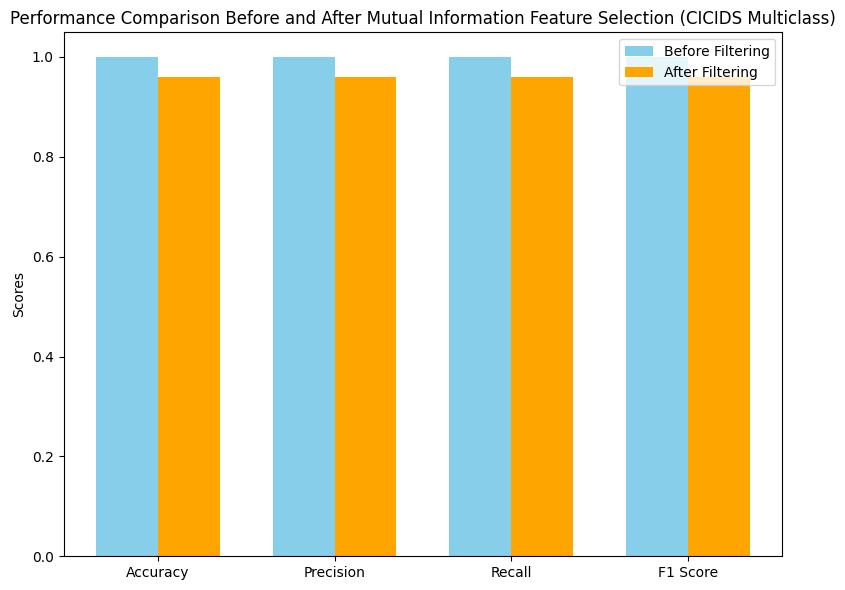

Before Filtering - Accuracy: 0.9993, Precision: 0.9993, Recall: 0.9993, F1 Score: 0.9993
After Filtering - Accuracy: 0.9594, Precision: 0.9599, Recall: 0.9593, F1 Score: 0.9592


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier  # Changed to LightGBM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/varthresh_multiclass_cicids.csv") 

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Create the original dataset (before filtering)
X_before = X.copy()
y_before = y.copy()

# Compute Mutual Information between features and target
mutual_info_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame to store features and MI scores
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info_scores
}).sort_values(by='Mutual Information', ascending=False)

# Select top 'k' features
k = 20
top_k_features = mutual_info_df['Feature'].head(k).values
X_after = X[top_k_features]

# Show number of features
print(f"Number of features before filtering: {X_before.shape[1]}")
print(f"Number of features after filtering (Mutual Information): {X_after.shape[1]}")

# Save filtered dataset
df_after_filtering = pd.concat([X_after, y], axis=1)
df_after_filtering.to_csv("multi_featm_cicids.csv", index=False)

# Split datasets
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X_before, y_before, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_after, y_before, test_size=0.2, random_state=42, stratify=y)

# Train classifier (using LightGBM instead of RandomForestClassifier)
clf = LGBMClassifier(random_state=42)

# Train and predict on unfiltered data
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict on filtered data
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics for multiclass (average='macro' for macro-average metrics)
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='macro')  # macro average for multiclass
recall_before = recall_score(y_test_before, y_pred_before, average='macro')
f1_before = f1_score(y_test_before, y_pred_before, average='macro')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='macro')
recall_after = recall_score(y_test_after, y_pred_after, average='macro')
f1_after = f1_score(y_test_after, y_pred_after, average='macro')

# Store results
classification_results1 = {}
classification_results1['Mutual Information'] = {
    'Accuracy': accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after
}

# Confusion matrices (for multiclass labels)
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

# Confusion Matrix Before Filtering
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Before Mutual Information Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix After Filtering
plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (After Mutual Information Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrices_cicids_multiclass_mutual_information.png", dpi=800)
plt.show()

# Plot performance comparison
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
rects2 = ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison Before and After Mutual Information Feature Selection (CICIDS Multiclass)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_cicids_multiclass_mutual_information.png", dpi=800)
plt.show()

# Print results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# **Recursive Feature Elimination**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15658
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 66
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15403
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 65
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15148
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 64
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14894
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 63
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14641
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 62
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14386
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 61
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14331
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 60
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14076
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 59
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13823
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 58
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13568
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 57
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13313
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 56
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13310
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 55
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13055
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 54
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12803
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 53
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12711
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 52
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12456
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 51
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12201
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 50
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11946
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 49
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11691
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 48
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11437
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 47
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11382
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 46
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11127
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 45
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10872
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 44
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10617
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 43
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10362
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 42
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10107
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 41
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9852
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 40
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9600
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 39
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9347
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 38
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9092
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 37
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8837
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 36
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8759
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 35
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8504
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 34
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8387
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 33
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8132
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 32
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7877
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 31
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7622
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 30
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7390
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 29
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7135
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 28
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6880
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 27
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6626
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 26
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6371
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 25
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6116
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 24
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5861
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 23
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5606
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 22
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5351
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 21
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5098
[LightGBM] [Info] Number of data points in the train set: 59906, number of used features: 20
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive 

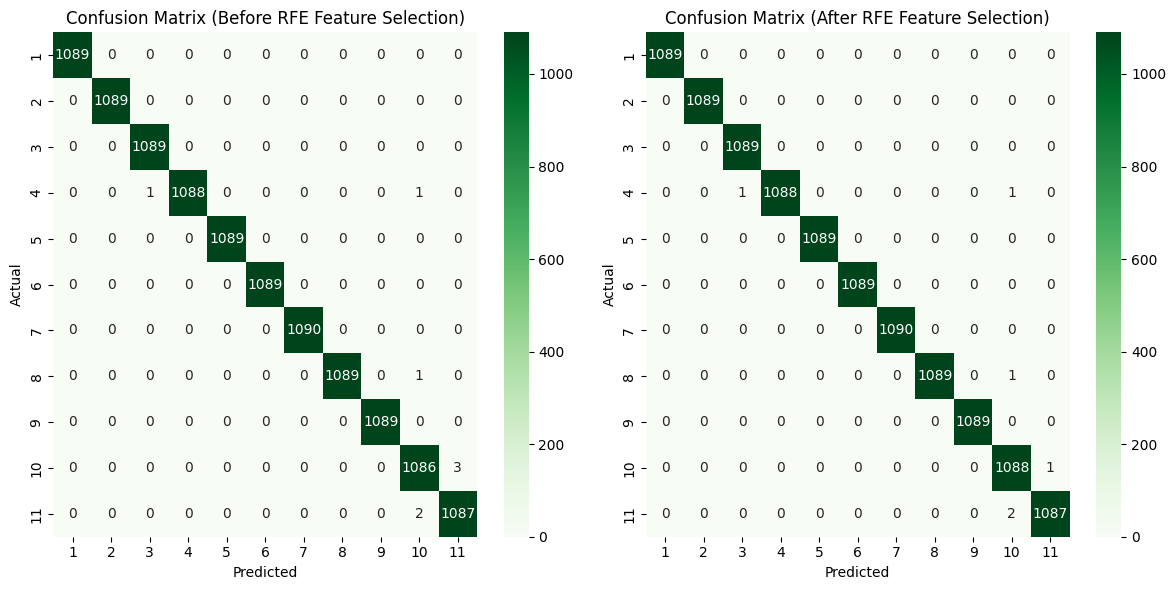

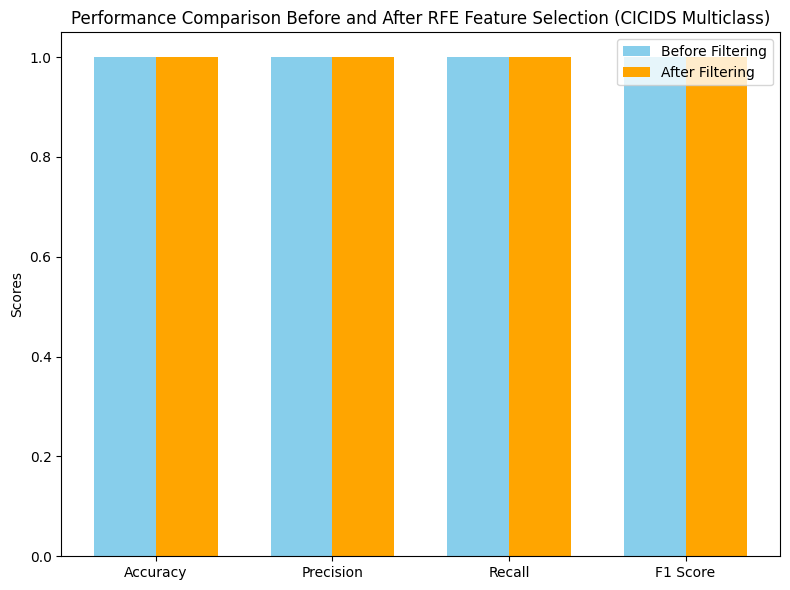

Before Filtering - Accuracy: 0.9993, Precision: 0.9993, Recall: 0.9993, F1 Score: 0.9993
After Filtering - Accuracy: 0.9995, Precision: 0.9995, Recall: 0.9995, F1 Score: 0.9995


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier  # Using LightGBM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/varthresh_multiclass_cicids.csv") 

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Create the original dataset (before filtering)
X_before = X.copy()
y_before = y.copy()

# Initialize LightGBM model
clf = LGBMClassifier(random_state=42)

# Recursive Feature Elimination (RFE) with cross-validation to determine the optimal number of features
rfe = RFE(estimator=clf, n_features_to_select=20)  # Select top 20 features 
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
X_after = X[selected_features]

# Show number of features
print(f"Number of features before filtering: {X_before.shape[1]}")
print(f"Number of features after RFE: {X_after.shape[1]}")

# Save filtered dataset
df_after_filtering = pd.concat([X_after, y], axis=1)
df_after_filtering.to_csv("multi_featm_cicids_rfe.csv", index=False)

# Split datasets
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X_before, y_before, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_after, y_before, test_size=0.2, random_state=42, stratify=y)

# Train classifier (using LightGBM instead of RandomForestClassifier)
clf = LGBMClassifier(random_state=42)

# Train and predict on unfiltered data
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict on filtered data
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics for multiclass (average='macro' for macro-average metrics)
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='macro')  # macro average for multiclass
recall_before = recall_score(y_test_before, y_pred_before, average='macro')
f1_before = f1_score(y_test_before, y_pred_before, average='macro')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='macro')
recall_after = recall_score(y_test_after, y_pred_after, average='macro')
f1_after = f1_score(y_test_after, y_pred_after, average='macro')

# Store results

classification_results1['RFE'] = {
    'Accuracy': accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after
}

# Confusion matrices (for multiclass labels)
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

# Confusion Matrix Before Filtering
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Before RFE Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix After Filtering
plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (After RFE Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrices_cicids_multiclass_rfe.png", dpi=800)
plt.show()

# Plot performance comparison
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
rects2 = ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison Before and After RFE Feature Selection (CICIDS Multiclass)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_cicids_multiclass_rfe.png", dpi=800)
plt.show()

# Print results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# comparison

In [ ]:
classification_results1

{'Mutual Information': {'Accuracy': 0.9593557002169921,
  'Precision': 0.9598594609095432,
  'Recall': 0.9593459042621223,
  'F1 Score': 0.9592447769324773},
 'SelectKBest': {'Accuracy': 0.956434651977967,
  'Precision': 0.9564598433061032,
  'Recall': 0.9564239713075864,
  'F1 Score': 0.9564295730991101},
 'RFE': {'Accuracy': 0.99949924887331,
  'Precision': 0.9995000406815706,
  'Recall': 0.9994993532259436,
  'F1 Score': 0.9994993913259929}}

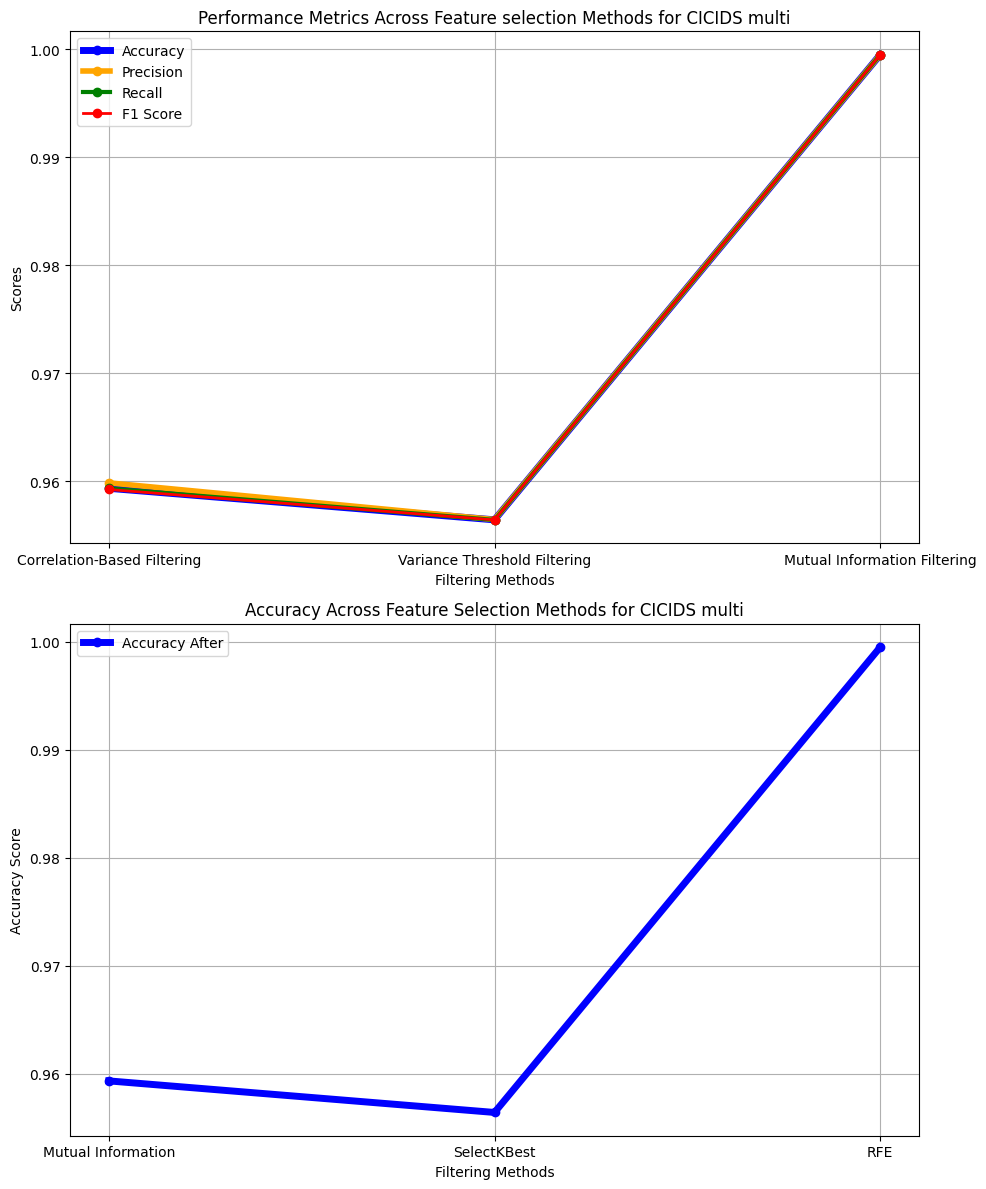

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create an empty dictionary to hold the metric values for each filtering method
metrics_values = {metric: [] for metric in metrics_names}

# Populate the dictionary with the values from classification_results
for method in classification_results1:
    for metric in metrics_names:
        metrics_values[metric].append(classification_results1[method][metric])

# Set distinct colors manually
colors = {
    'Accuracy': 'blue',
    'Precision': 'orange',
    'Recall': 'green',
    'F1 Score': 'red'
}

# Set line widths manually (thicker first)
line_widths = {
    'Accuracy': 5,
    'Precision': 4,
    'Recall': 3,
    'F1 Score': 2
}

# Create a figure with 2 subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# =========================
# First Plot: All Metrics
# =========================
for metric in sorted(metrics_names, key=lambda x: -line_widths[x]):
    axs[0].plot(
        list(classification_results.keys()),
        metrics_values[metric],
        label=metric,
        marker='o',
        linewidth=line_widths[metric],
        color=colors[metric]
    )

axs[0].set_xlabel('Filtering Methods')
axs[0].set_ylabel('Scores')
axs[0].set_title('Performance Metrics Across Feature selection Methods for CICIDS multi')
axs[0].legend()
axs[0].grid(True)

# =========================
# Second Plot: Accuracy Only
# =========================
axs[1].plot(
    list(classification_results1.keys()),
    metrics_values['Accuracy'],
    label='Accuracy After',
    marker='o',
    linewidth=5,
    color='blue'
)

axs[1].set_xlabel('Filtering Methods')
axs[1].set_ylabel('Accuracy Score')
axs[1].set_title('Accuracy Across Feature Selection Methods for CICIDS multi')
axs[1].legend()
axs[1].grid(True)

# Layout adjustment
plt.tight_layout()

# Save the whole figure
plt.savefig('performance_metrics_multi_cicids_featureselection_with_accuracy.png', dpi=800)

# Show the plots
plt.show()
